## Observations and Insights 

Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study.

The pie charts shows that the mice sampled are equally distributed across genders.

The box plot and line plots of the final tumor volume of each mouse across four regimens of interest shows that tumor volumes are higher for Capomulin and Ramicane. Infubinol has one lower outlier.

The line plot of tumor volume vs. time point for a mouse treated with Capomulin shows a concentration of timepoints around 45. The mean of 41 and the median of 45 confirms this. The correlation coefficent is negative 0.22.

The tumor volume vs mouse weight is positively correlated for the mice treated with Capomulin. The tumor volume increases as the mouse weight increases. This is shown in the scatter plot. The correlation coeficient is positive 0.88.

In [188]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview:

In [189]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [190]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [191]:
merge_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [192]:
merge_data.shape

(1893, 8)

In [193]:
# Checking the number of mice. 

## Value_counts() returns unique values of Mouse ID
count1 = merge_data["Mouse ID"].value_counts()
count1.shape

(249,)

In [194]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_data[['Mouse ID','Timepoint']].duplicated().sum()

5

In [195]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicatemouse = merge_data.loc[merge_data[['Mouse ID','Timepoint']].duplicated(),:]
print(duplicatemouse)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [196]:
dup2 = duplicatemouse.iloc[1,0]
print(dup2)

g989


In [197]:
troubledmouse = merge_data[merge_data['Mouse ID'] == dup2]
troubledmouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [198]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_data[merge_data['Mouse ID'] != dup2]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [199]:
# Checking the number of mice in the clean DataFrame.

In [200]:
### Value_counts() returns unique values of Mouse ID
countcleanmice = clean_df["Mouse ID"].value_counts()
countcleanmice.shape

(248,)

## Summary Statistics

In [201]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

In [202]:
stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

In [203]:
mean = stats.mean()
median = stats.median()
stat1 = pd.merge(mean, median, how="inner", on=["Drug Regimen"])

In [204]:
var = stats.var()
std = stats.std()
stat2 = pd.merge(var, std, how="inner", on=["Drug Regimen"])

In [205]:
stat3 = pd.merge(stat1, stat2, how="inner", on=["Drug Regimen"])

In [206]:
sem = stats.sem()

In [207]:
statistic_df = pd.merge(stat3, sem, how="inner", on=["Drug Regimen"])
statistic_df.columns = ['Mean', 'Median', 'Variance', 'Std', 'SEM']
statistic_df

,Mean,Median,Variance,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [208]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
RegimenTumor_df = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].agg(['mean','median',np.var,np.std,'sem'])
RegimenTumor_df.head(10)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [209]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
MiceTimepointDrug = clean_df.groupby("Drug Regimen")['Timepoint'].count()
MiceTimepointDrug.head(10)

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

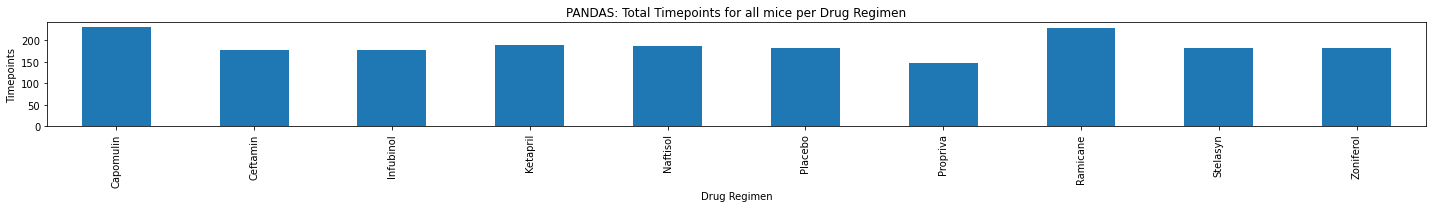

In [210]:
MiceTimepointDrug.plot(kind = 'bar', figsize = (20,3))
plt.title('PANDAS: Total Timepoints for all mice per Drug Regimen')
plt.ylabel('Timepoints')
plt.tight_layout()
plt.show()

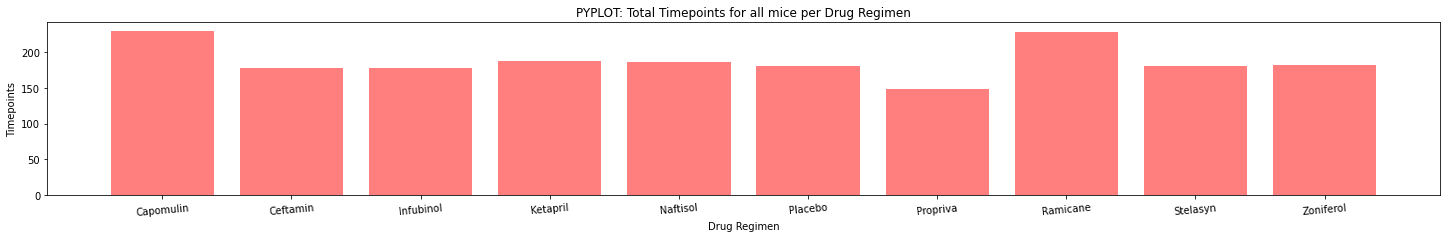

In [211]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x = np.arange(len(MiceTimepointDrug))
y = clean_df.groupby("Drug Regimen")['Timepoint'].count()
tick_locations = [value for value in x]
plt.figure(figsize=(20,3))
plt.xticks(tick_locations,['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol'], rotation=5)
plt.bar(x,y,color='r', alpha=0.5, align="center")
plt.tight_layout()
plt.title('PYPLOT: Total Timepoints for all mice per Drug Regimen')
plt.ylabel('Timepoints')
plt.xlabel('Drug Regimen')
plt.show()

In [212]:
pie = mouse_metadata.groupby('Sex').count()
del pie['Drug Regimen']
del pie['Age_months']
del pie['Weight (g)']
pie.rename(columns = {'Mouse ID' : 'Mouse Gender'}, inplace = True)
pie

,Mouse Gender
Sex,
Female,124
Male,125


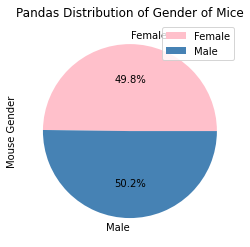

In [213]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie.plot(kind='pie', y='Mouse Gender', autopct='%1.1f%%',
                                colors = ['pink', 'steelblue'],
                                title='Pandas Distribution of Gender of Mice')
plt.show()

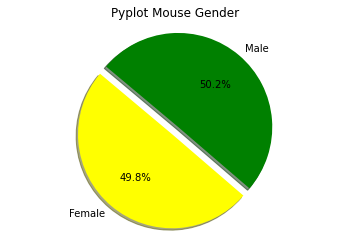

In [214]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pies = ["Female", "Male"]
pie_count = pie['Mouse Gender']
colors = ["yellow","green"]
explode = (0.1,0)
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(pie_count, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle and print to screen
plt.axis("equal")
plt.title('Pyplot Mouse Gender')
plt.show()

## Quartiles, Outliers and Boxplots

In [215]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [216]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [217]:
lasttime = clean_df.drop_duplicates(keep='last',subset='Mouse ID')
lasttime

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [245]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
Vol = []

for treatment in treatments:
    if treatment == 'Capomulin':
        cap = (lasttime.loc[lasttime['Drug Regimen']==treatment,'Tumor Volume (mm3)'])
        capmean = cap.mean()
        Vol.append(capsort)  
    elif treatment == 'Ramicane':   
        ram = (lasttime.loc[lasttime['Drug Regimen']==treatment,'Tumor Volume (mm3)'])
        rammean = ram.mean()
        Vol.append(ram)
    elif treatment == 'Infubinol':   
        inf = (lasttime.loc[lasttime['Drug Regimen']==treatment,'Tumor Volume (mm3)'])
        infmean = inf.mean()
        Vol.append(inf)
    elif treatment == 'Ceftamin':   
        cef = (lasttime.loc[lasttime['Drug Regimen']==treatment,'Tumor Volume (mm3)'])
        cefmean = cef.mean()
        Vol.append(cef)

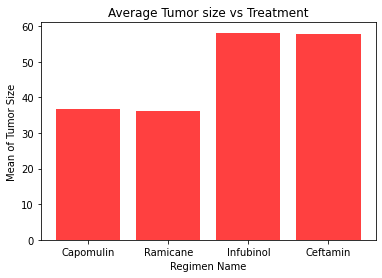

In [248]:
## Plot mean of each tumor
meantumor = [capmean, rammean, infmean, cefmean]
plt.title("Average Tumor size vs Treatment")
plt.xlabel("Regimen Name")
plt.ylabel("Mean of Tumor Size")
plt.bar(treatments, meantumor, facecolor="red", alpha=0.75, align="center")
plt.show()

In [220]:
### Plot Tumor volume for mice tested by 4 Drug Regimen
### Calculate number of mice tested with each drug:
x_cap = np.arange(0, len(cap))
x_ram = np.arange(0, len(ram))
x_inf = np.arange(0, len(inf))
x_cef = np.arange(0, len(cef))

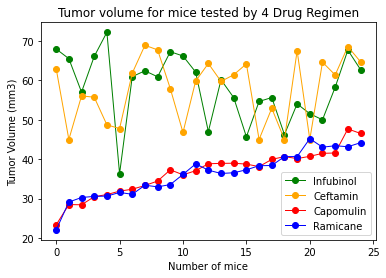

In [221]:
plt.plot(x_inf, inf, marker="o", color="green", linewidth=1, label="Infubinol")
plt.plot(x_cef, cef, marker="o", color="orange", linewidth=1, label="Ceftamin")
plt.plot(x_cap, cap, marker="o", color="red", linewidth=1, label="Capomulin")
plt.plot(x_ram, ram, marker="o", color="blue", linewidth=1, label="Ramicane")
plt.legend(loc="best")
plt.title("Tumor volume for mice tested by 4 Drug Regimen")
plt.xlabel("Number of mice")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

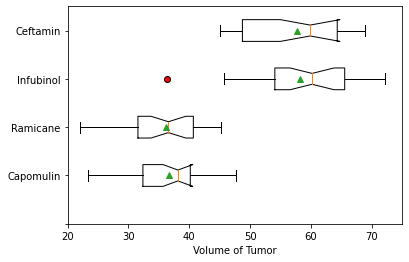

In [265]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_circle = dict(markerfacecolor='red',marker='o')
plt.boxplot(x=Vol, vert=False, flierprops=red_circle, showmeans=True, notch=True)
plt.xlabel('Volume of Tumor')
plt.xlim(20, 75)
plt.yticks(np.arange(5), ["",'Capomulin', 'Ramicane', 'Infubinol','Ceftamin'])
plt.show()

In [ ]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [222]:
quartiles = cap.quantile([.25,.5,.75])
lowercap = quartiles[0.25]
uppercap = quartiles[0.75]
iqr = uppercap-lowercap
lower_boundcap = lowercap - (1.5*iqr)
upper_boundcap = uppercap + (1.5*iqr)
print(treatments[0])
print(f"Volumes below {lower_boundcap} could be outliers.")
print(f"Volumes above {upper_boundcap} could be outliers.")

Capomulin
Volumes below 20.70456164999999 could be outliers.
Volumes above 51.83201549 could be outliers.


In [223]:
quartiles = ram.quantile([.25,.5,.75])
lowerram = quartiles[0.25]
upperram = quartiles[0.75]
iqr = upperram-lowerram
lower_boundram = lowerram - (1.5*iqr)
upper_boundram = upperram + (1.5*iqr)
print(treatments[1])
print(f"Volumes below {lower_boundram} could be outliers.")
print(f"Volumes above {upper_boundram} could be outliers.")

Ramicane
Volumes below 17.912664470000003 could be outliers.
Volumes above 54.30681135 could be outliers.


In [224]:
quartiles = inf.quantile([.25,.5,.75])
lowerinf = quartiles[0.25]
upperinf = quartiles[0.75]
iqr = upperinf-lowerinf
lower_boundinf = lowerinf - (1.5*iqr)
upper_boundinf = upperinf + (1.5*iqr)
print(treatments[2])
print(f"Volumes below {lower_boundinf} could be outliers.")
print(f"Volumes above {upper_boundinf} could be outliers.")

Infubinol
Volumes below 36.83290494999999 could be outliers.
Volumes above 82.74144559000001 could be outliers.


In [225]:
quartiles = cef.quantile([.25,.5,.75])
lowercef = quartiles[0.25]
uppercef = quartiles[0.75]
iqr = uppercef-lowercef
lower_boundcef = lowercef - (1.5*iqr)
upper_boundcef = uppercef + (1.5*iqr)
print(treatments[3])
print(f"Volumes below {lower_boundcef} could be outliers.")
print(f"Volumes above {upper_boundcef} could be outliers.")

Ceftamin
Volumes below 25.355449580000002 could be outliers.
Volumes above 87.66645829999999 could be outliers.


In [255]:
q = lasttime['Tumor Volume (mm3)']
quartiles = q.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print("Total IQR of the last timepoint tumor of all mice:")
print(f"   The lower quartile is: {lowerq}")
print(f"   The upper quartile is: {upperq}")
print(f"   The interquartile range is: {iqr}")
print(f"   The the median is: {quartiles[0.5]} ")
print("Total Outliers of the last timepoint tumor of all mice:")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"   Volumes below {lower_bound} could be outliers.")
print(f"   Volumes above {upper_bound} could be outliers.")

Total IQR of the last timepoint tumor of all mice:
   The lower quartile is: 45.8758668475
   The upper quartile is: 65.05362410500001
   The interquartile range is: 19.177757257500012
   The the median is: 55.793278175 
Total Outliers of the last timepoint tumor of all mice:
   Volumes below 17.10923096124998 could be outliers.
   Volumes above 93.82025999125003 could be outliers.


In [227]:
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
CapomulinV = lasttime.loc[(lasttime['Drug Regimen']=='Capomulin'),:]
RamicaneV = lasttime.loc[(lasttime['Drug Regimen']=='Ramicane'),:]
InfubinolV = lasttime.loc[(lasttime['Drug Regimen']=='Infubinol'),:]
CeftaminV = lasttime.loc[(lasttime['Drug Regimen']=='Ceftamin'),:]
xc = CapomulinV['Tumor Volume (mm3)']
xr = RamicaneV['Tumor Volume (mm3)']
xi = InfubinolV['Tumor Volume (mm3)']
xce = CeftaminV['Tumor Volume (mm3)']

In [244]:
# Determine outliers using upper and lower bounds
outlier = []
drug = []
for x in xc:
    if x <= lower_boundcap:
        outlier.append(x)
        drug.append('Capomulin')
    elif x >= upper_boundcap:  
        outlier.append(x)
        drug.append('Capomulin')
for x in xr:
    if x <= lower_boundram:
        outlier.append(x)
        drug.append('Ramicane')
    elif x >= upper_boundram:  
        outlier.append(x)
        drug.append('Ramicane')
for x in xi:
    if x <= lower_boundinf:
        outlier.append(x)
        drug.append('Infubinol')
    elif x >= upper_boundinf:  
        outlier.append(x)
        drug.append('Infubinol')
for x in xce:
    if x <= lower_boundcef:
        outlier.append(x)
        drug.append('Ceftamin')
    elif x >= upper_boundcef:  
        outlier.append(x)
        drug.append('Ceftamin')
if outlier != []:
    print(f'For drug regimen {drug} the Tumor volume outlier is: {outlier}')
else:
    print('Sorry, there are no Tumor Volume outliers for these four Drug Regimen!')     
         

For drug regimen ['Infubinol'] the Tumor volume outlier is: [36.3213458]


## Line and Scatter Plots

In [234]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

In [235]:
xv = Capomulin['Tumor Volume (mm3)']
xt = Capomulin['Timepoint']

In [277]:
xtmean = xt.mean()
xtmedian = xt.median()
corr = st.pearsonr(xv,xt)
print(f"The corr between both factors is {round(correlation[0],2)}, the mean is {xtmean} and median is {xtmedian}")

The corr between both factors is -0.2, the mean is 41.0 and median is 45.0


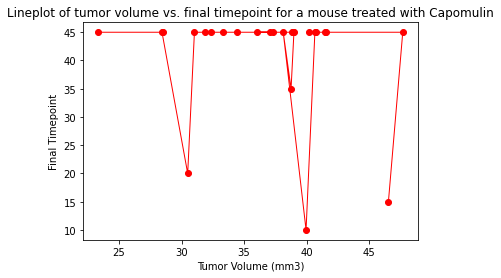

In [236]:
plt.plot(xv, xt, marker="o", color="red", linewidth=1)
plt.title('Lineplot of tumor volume vs. final timepoint for a mouse treated with Capomulin')
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Final Timepoint")
plt.show()

In [237]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
xv = Capomulin['Tumor Volume (mm3)']
xw = Capomulin['Weight (g)']

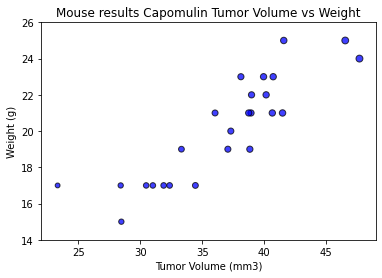

In [238]:
plt.scatter(xv, xw, marker="o", facecolors="blue", edgecolors="black", s=xv, alpha=0.75)
plt.ylim(14, 26)
plt.xlim(22, 49)
plt.title("Mouse results Capomulin Tumor Volume vs Weight")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.show()

## Correlation and Regression

In [239]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regime

In [240]:
correlation = st.pearsonr(xv,xw)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.88


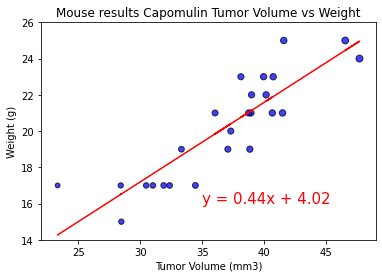

In [241]:
plt.scatter(xv, xw, marker="o", facecolors="blue", edgecolors="black", s=xv, alpha=0.75)
plt.ylim(14, 26)
plt.xlim(22, 49)
(slope, intercept, rvalue, pvalue, stderr) = linregress(xv, xw)
regress_values = xv * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(xv,regress_values,"r-")
plt.title("Mouse results Capomulin Tumor Volume vs Weight")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.annotate(line_eq,(35,16),fontsize=15,color="red")
plt.show()

In [242]:
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.7686134812138998
